In [1]:
import pencil as pc
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 11})

In [3]:
param = pc.read.param()

In [4]:
grid = pc.read.grid(trim=True, quiet=True)

In [5]:
z = grid.z
x = grid.x
y = grid.y

In [6]:
sim = pc.get_sim()

In [7]:
sim.get_varlist()

['VAR0',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'VAR8',
 'VAR9',
 'VAR10',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR14',
 'VAR15',
 'VAR16',
 'VAR17',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21',
 'VAR22',
 'VAR23',
 'VAR24',
 'VAR25',
 'VAR26',
 'VAR27',
 'VAR28',
 'VAR29',
 'VAR30',
 'VAR31',
 'VAR32',
 'VAR33',
 'VAR34',
 'VAR35',
 'VAR36',
 'VAR37',
 'VAR38',
 'VAR39',
 'VAR40',
 'VAR41',
 'VAR42',
 'VAR43',
 'VAR44',
 'VAR45',
 'VAR46',
 'VAR47',
 'VAR48',
 'VAR49',
 'VAR50',
 'VAR51',
 'VAR52',
 'VAR53',
 'VAR54',
 'VAR55',
 'VAR56',
 'VAR57',
 'VAR58',
 'VAR59',
 'VAR60',
 'VAR61',
 'VAR62',
 'VAR63',
 'VAR64',
 'VAR65',
 'VAR66',
 'VAR67',
 'VAR68',
 'VAR69',
 'VAR70',
 'VAR71',
 'VAR72',
 'VAR73',
 'VAR74',
 'VAR75',
 'VAR76',
 'VAR77',
 'VAR78',
 'VAR79',
 'VAR80',
 'VAR81',
 'VAR82',
 'VAR83',
 'VAR84',
 'VAR85',
 'VAR86',
 'VAR87',
 'VAR88',
 'VAR89',
 'VAR90',
 'VAR91',
 'VAR92',
 'VAR93',
 'VAR94',
 'VAR95',
 'VAR96',
 'VAR97',
 'VAR98',
 'VAR99',
 'VAR100',

In [8]:
sim.get_var_time('VAR7')

350.00197

In [9]:
# vars = np.zeros()
# var = pc.read.var(var_file='VAR147', magic=['bb'], trimall=True)
var = pc.read.var(var_file='VAR7', magic=['bb'], trimall=True)

In [10]:
var.keys()

t
dx
dy
dz
x
y
z
f
l1
l2
m1
m2
n1
n2
magic
bb
uu
ux
uy
uz
lnrho
aa
ax
ay
az


In [11]:
var.t

350.0019668417268

In [12]:
var.bb.shape

(3, 128, 128, 128)

In [73]:
uz = var.uz[np.argmin(np.abs(z-0)),:,:]
# uz = var.bb[2,np.argmin(np.abs(z-0)),:,:]

In [74]:
uz_ave = np.average(uz)
uz_p = uz - uz_ave
uz_p

array([[0.17451967, 0.17491797, 0.17031569, ..., 0.14429233, 0.15896171,
        0.16913939],
       [0.16716975, 0.16608827, 0.16010112, ..., 0.14187024, 0.15480898,
        0.16334791],
       [0.15929148, 0.15670683, 0.14931613, ..., 0.13898489, 0.15017216,
        0.15705138],
       ...,
       [0.18961728, 0.19395527, 0.19303277, ..., 0.14604722, 0.16542366,
        0.18004791],
       [0.18623093, 0.1893664 , 0.18732256, ..., 0.14676563, 0.16469287,
        0.17794714],
       [0.1810179 , 0.18283245, 0.1795552 , ..., 0.14603459, 0.16237912,
        0.17413973]])

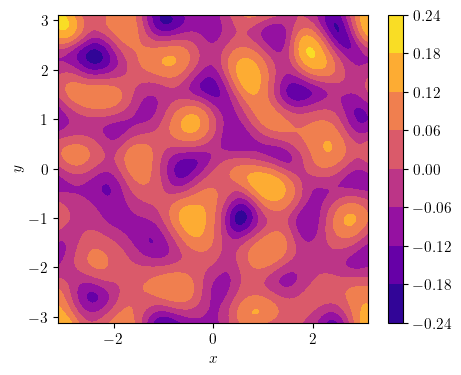

In [75]:
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(5,4.0))
plt.contourf(X, Y, uz_p , cmap='plasma')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [76]:
uz_f = np.fft.fftshift(np.fft.fft2(uz_p, norm='forward'))

In [77]:
power_2d = np.abs(uz_f)**2

In [78]:
kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1]-x[0])))
ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(y), d=(y[1]-y[0])))

In [79]:
(x[-1]-x[0])/128
x_min = (x[1]-x[0])
x_min
kx_max = 2*np.pi/x_min
kx_max
x_max = x[-1]-x[0]
x_max
kx_min = 2*np.pi/x_max
kx_min


1.007873239077751

In [80]:
# size = np.shape(uz)
# lxyz = param.lxyz   #shape of the box
# #size
# nx = size[1]
# lx = lxyz[0]
# dkx = 2*np.pi/lx    #unit step along kx direction

In [81]:
# if nx%2 == 0:
#     fnx = np.arange(0, nx/2)
#     rnx = -np.flip(np.arange(1, nx/2+1))
#     kx = np.concatenate((fnx, rnx))*dkx
# else:
#     fnx = np.arange(0, nx/2)
#     rnx = -np.flip(np.arange(1, nx/2))
#     kx = np.concatenate((fnx, rnx))*dkx
# kx = np.fft.fftshift(kx)

In [82]:
# kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1]-x[0])))
# ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(y), d=(y[1]-y[0])))

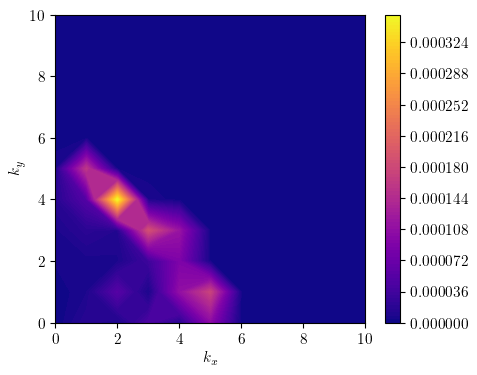

In [83]:
full = False
X, Y = np.meshgrid(kx, ky)
fig = plt.figure(figsize=(5,4.0))
plt.contourf(X, Y, power_2d, 100 , cmap='plasma')
plt.colorbar()
if full==True:
    llim = -10
else:
    llim = 0
plt.xlim(llim,10)
plt.ylim(llim,10)
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.savefig('uz.png')
plt.show()

In [84]:
def power_spectra(uz, plot=False):
    uz_ave = np.average(uz)
    uz_p = uz - uz_ave
    uz_f = np.fft.fftshift(np.fft.fft2(uz_p, norm='ortho'))
    power_2d = np.abs(uz_f)**2
    x = grid.x
    y = grid.y
    kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1]-x[0])))
    ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(y), d=(y[1]-y[0])))
    kfreq2D = np.meshgrid(kx, ky)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
    knrm = knrm.flatten()
    fourier_amplitudes = power_2d.flatten()
    npix = power_2d.shape[0]
    kbins = np.arange(0.5, npix//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])

    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

    if plot==True:
        plt.figure(figsize=(5,4))
        plt.loglog(kvals, Abins, label=fr'$t={np.round(var.t,2)}$')
        plt.xlabel(r"$k$")
        plt.ylabel(r"$P(k)$")
        plt.tight_layout()
        plt.savefig(f'plots/power_spectra.png', dpi = 300, bbox_inches = "tight")
    return [kvals, Abins]

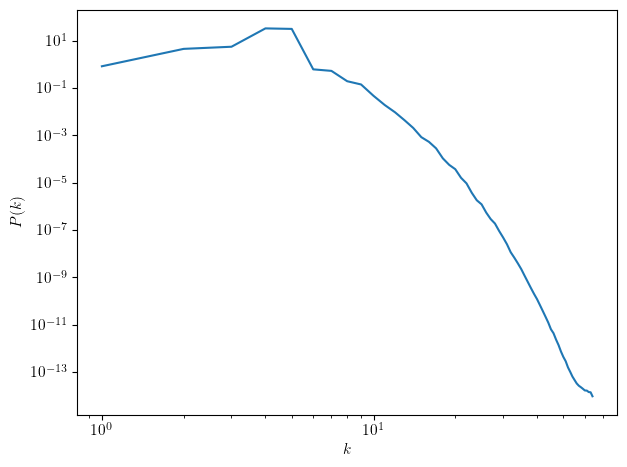

In [85]:
kv, Ab = power_spectra(uz, plot=True)

In [86]:
kfreq2D = np.meshgrid(kx, ky)

In [87]:
# kfreq2D.shape

In [88]:
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

In [89]:
kfreq2D[0].shape

(128, 128)

In [90]:
knrm

array([[90.50941133, 89.80509038, 89.10642495, ..., 88.41354911,
        89.10642495, 89.80509038],
       [89.80509038, 89.09520177, 88.39092537, ..., 87.6923964 ,
        88.39092537, 89.09520177],
       [89.10642495, 88.39092537, 87.68099222, ..., 86.97676181,
        87.68099222, 88.39092537],
       ...,
       [88.41354911, 87.6923964 , 86.97676181, ..., 86.26678267,
        86.97676181, 87.6923964 ],
       [89.10642495, 88.39092537, 87.68099222, ..., 86.97676181,
        87.68099222, 88.39092537],
       [89.80509038, 89.09520177, 88.39092537, ..., 87.6923964 ,
        88.39092537, 89.09520177]])

In [91]:
knrm = knrm.flatten()
fourier_amplitudes = power_2d.flatten()

In [92]:
knrm.shape

(16384,)

In [93]:
fourier_amplitudes.shape

(16384,)

In [94]:
npix = power_2d.shape[0]

In [95]:
npix

128

In [96]:
kbins = np.arange(0.5, npix//2+1, 1.)
kbins

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
       33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
       44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
       55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5])

In [97]:
kvals = 0.5 * (kbins[1:] + kbins[:-1])
kvals

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.])

In [98]:
fourier_amplitudes.shape

(16384,)

In [99]:
knrm.shape

(16384,)

In [100]:
# import scipy.stats as stats

Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)

In [101]:
Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

In [102]:
Abins.shape

(64,)

In [103]:
def func(x, a, b):
    return a*x**b

In [104]:
kk = kvals[np.argmin(np.abs(kvals-7)):np.argmin(np.abs(kvals-20))]
ppss = Abins[np.argmin(np.abs(kvals-7)):np.argmin(np.abs(kvals-20))]

In [105]:
para, _ = curve_fit(func, kk, ppss)
ps_fit = func(kk, *para)

In [106]:
para[1]

-6.562883719065541

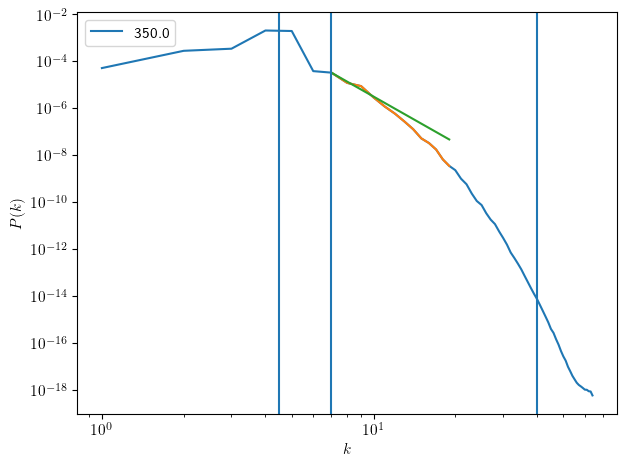

In [107]:
plt.loglog(kvals, Abins, label=np.round(var.t))
# plt.plot(kvals, Abins)
plt.plot(kk, ppss)
plt.plot(kk, ps_fit)
plt.axvline(x=7)
plt.axvline(x=4.472)
plt.axvline(x=40)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.legend()
plt.tight_layout()
plt.savefig("power_spectrum.png", dpi = 300, bbox_inches = "tight")

In [108]:
power = pc.read.power()

power_krms.dat
power_mag.dat
powerhel_kin.dat
power_kin.dat
powerhel_mag.dat
poweruz_xy.dat


In [109]:
power.keys()

t
krms
mag
hel_kin
kin
hel_mag
kx
ky
zpos
nzpos
uz_xy


In [110]:
power.t

array([5.0154748e+00, 1.0017271e+01, 1.5017151e+01, ..., 7.8250171e+03,
       7.8300215e+03, 7.8350137e+03], dtype=float32)

In [111]:
power.zpos

array([-0.0247])

In [112]:
z

array([-3.14159   , -3.092116  , -3.042642  , -2.993168  , -2.9436944 ,
       -2.8942204 , -2.8447464 , -2.7952724 , -2.7457986 , -2.6963246 ,
       -2.6468506 , -2.5973766 , -2.5479028 , -2.4984288 , -2.4489548 ,
       -2.399481  , -2.350007  , -2.300533  , -2.251059  , -2.2015853 ,
       -2.1521113 , -2.1026373 , -2.0531633 , -2.0036895 , -1.9542155 ,
       -1.9047415 , -1.8552676 , -1.8057936 , -1.7563198 , -1.7068459 ,
       -1.6573719 , -1.607898  , -1.558424  , -1.5089501 , -1.4594761 ,
       -1.4100022 , -1.3605282 , -1.3110543 , -1.2615803 , -1.2121065 ,
       -1.1626325 , -1.1131586 , -1.0636847 , -1.0142107 , -0.96473676,
       -0.9152628 , -0.8657889 , -0.81631494, -0.766841  , -0.7173671 ,
       -0.6678932 , -0.61841923, -0.5689453 , -0.51947135, -0.4699974 ,
       -0.42052346, -0.37104952, -0.32157558, -0.27210164, -0.22262771,
       -0.17315377, -0.12367984, -0.07420591, -0.02473197,  0.02474197,
        0.0742159 ,  0.12368985,  0.17316379,  0.22263771,  0.27

In [113]:
power.kx

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.])

In [114]:
var.t

350.0019668417268

In [115]:
power.t[np.argmin(np.abs(power.t-var.t))]

350.01312

In [116]:
power.uz_xy.shape

(1567, 1, 64, 64)

In [117]:
power.zpos

array([-0.0247])

In [118]:
# uz_xy = power.uz_xy[np.argmin(np.abs(power.t-var.t)),0,:,:]
uz_xy = power.uz_xy[np.argmin(np.abs(power.t-350)),0,:,:]

In [119]:
np.max(power.uz_xy)

(0.0202+0.00782j)

In [120]:
kx[64:]

array([ 0.        ,  0.99999716,  1.99999433,  2.99999149,  3.99998866,
        4.99998582,  5.99998299,  6.99998015,  7.99997731,  8.99997448,
        9.99997164, 10.99996881, 11.99996597, 12.99996313, 13.9999603 ,
       14.99995746, 15.99995463, 16.99995179, 17.99994896, 18.99994612,
       19.99994328, 20.99994045, 21.99993761, 22.99993478, 23.99993194,
       24.99992911, 25.99992627, 26.99992343, 27.9999206 , 28.99991776,
       29.99991493, 30.99991209, 31.99990925, 32.99990642, 33.99990358,
       34.99990075, 35.99989791, 36.99989508, 37.99989224, 38.9998894 ,
       39.99988657, 40.99988373, 41.9998809 , 42.99987806, 43.99987523,
       44.99987239, 45.99986955, 46.99986672, 47.99986388, 48.99986105,
       49.99985821, 50.99985537, 51.99985254, 52.9998497 , 53.99984687,
       54.99984403, 55.9998412 , 56.99983836, 57.99983552, 58.99983269,
       59.99982985, 60.99982702, 61.99982418, 62.99982135])

(0.0, 10.0)

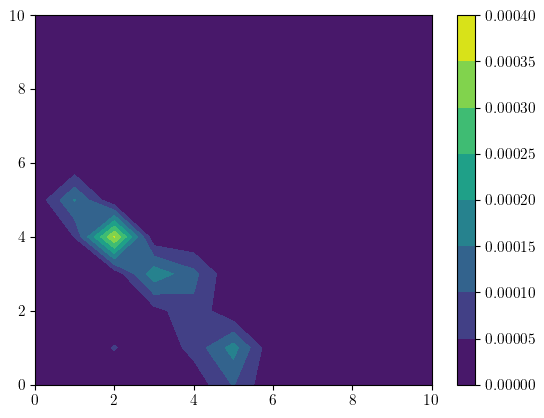

In [121]:
X, Y = np.meshgrid(kx[64:], ky[64:])
plt.contourf(X, Y, np.abs(uz_xy)**2)
# plt.plot(power.mag[np.argmin(np.abs(power.t-10)),:])
plt.colorbar()
plt.xlim(0,10)
plt.ylim(0,10)

In [122]:
(np.abs(uz_xy)**2).shape

(64, 64)

In [123]:
uz.shape

(128, 128)

In [124]:
def power_spectra(uz, plot=False):
    uz_ave = np.average(uz)
    uz_p = uz - uz_ave
    uz_f = np.fft.fftshift(np.fft.fft2(uz_p, norm='ortho'))
    power_2d = np.abs(uz_f)**2
    x = grid.x[64:]
    y = grid.y[64:]
    kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1]-x[0])))
    ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(y), d=(y[1]-y[0])))
    kfreq2D = np.meshgrid(kx, ky)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
    knrm = knrm.flatten()
    fourier_amplitudes = power_2d.flatten()
    npix = power_2d.shape[0]
    kbins = np.arange(0.5, npix//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])

    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

    if plot==True:
        plt.loglog(kvals, Abins)
        plt.xlabel(r"$k$")
        plt.ylabel(r"$P(k)$")
        plt.tight_layout()
        plt.savefig(f'plots/power_spectra.png', dpi = 300, bbox_inches = "tight")
    return [kvals, Abins]

In [125]:
power_2d[64:,64:].shape

(64, 64)

In [126]:
X[64:].shape

(0, 64)

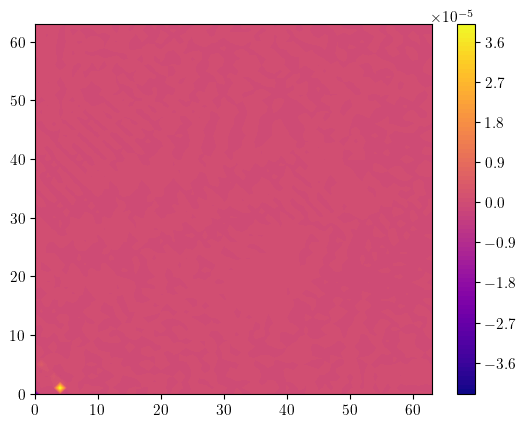

In [127]:
X, Y = np.meshgrid(kx[64:], ky[64:])
plt.contourf(X[:,:], Y[:,:], power_2d[64:,64:]-np.abs(uz_xy)**2, 100 , cmap='plasma')
plt.colorbar()

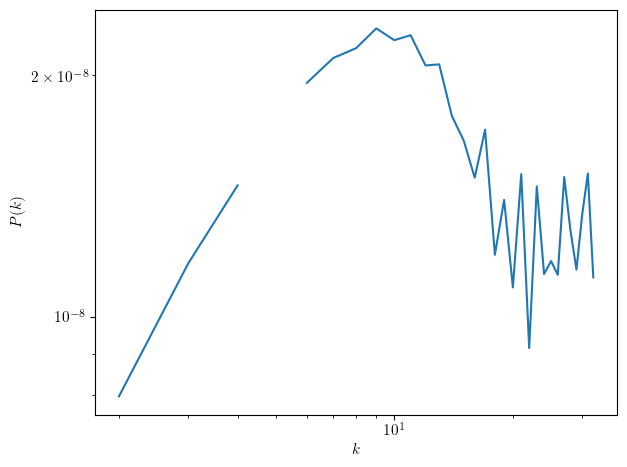

In [128]:
kv, Ab = power_spectra(np.abs(uz_xy)**2, plot=True)